Automate Machine Learning with TPOT
===================================

This example shows how [TPOT](https://epistasislab.github.io/tpot/) can be used with Dask.

TPOT is an [automated machine learning](https://en.wikipedia.org/wiki/Automated_machine_learning) library.
It evaluates many scikit-learn pipelines and hyperparameter combinations to find a model that works well for your data. Evaluating all these computations is computationally expensive, but ammenable to parallelism. TPOT can use Dask to distribute these computations on a cluster of machines.

This notebook can be run interactively on the [dask examples binder](https://github.com/dask/dask-examples).
The following video shows a larger version of this notebook on a cluster.

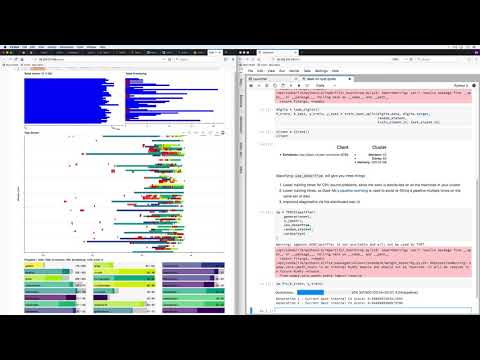

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo("uyx9nBuOYQQ")

In [2]:
%pip install TPOT --quiet

Note: you may need to restart the kernel to use updated packages.


In [3]:
import tpot
from tpot import TPOTClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

## Setup Dask

We first start a Dask client in order to get access to the Dask dashboard, which will provide progress and performance metrics. 

You can view the dashboard by clicking on the dashboard link after you run the cell.

In [4]:
from dask.distributed import Client

client = Client(n_workers=4, threads_per_worker=1)
client

<Client: 'tcp://127.0.0.1:60714' processes=4 threads=4, memory=31.63 GiB>

## Create Data

We'll use the digits dataset.
To ensure the example runs quickly, we'll make the training dataset relatively small.

In [5]:
digits = load_digits()

X_train, X_test, y_train, y_test = train_test_split(
    digits.data,
    digits.target,
    train_size=0.05,
    test_size=0.95,
)

These are just small, in-memory NumPy arrays. This example is not applicable to larger-than-memory Dask arrays.

## Using Dask

TPOT follows the scikit-learn API; we specify a `TPOTClassifier` with a few hyperparameters, and then fit it on some data.
By default, TPOT trains on your single machine.
To ensure your cluster is used, specify the `use_dask` keyword.

In [8]:
# scale up: Increase the TPOT parameters like population_size, generations
tp = TPOTClassifier(
    generations=5,
    population_size=25,
    cv=3,
    n_jobs=-1,
    random_state=0,
    verbosity=0,
    config_dict=tpot.config.classifier_config_dict_light,
    use_dask=True,
)

In [9]:
tp.fit(X_train, y_train)

TPOTClassifier(config_dict={'sklearn.cluster.FeatureAgglomeration': {'affinity': ['euclidean',
                                                                                  'l1',
                                                                                  'l2',
                                                                                  'manhattan',
                                                                                  'cosine'],
                                                                     'linkage': ['ward',
                                                                                 'complete',
                                                                                 'average']},
                            'sklearn.decomposition.PCA': {'iterated_power': range(1, 11),
                                                          'svd_solver': ['randomized']},
                            'sklearn.feature_selection.SelectFwe': {'alpha': array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007...
                                                                          'max']},
                            'sklearn.preprocessing.RobustScaler': {},
                            'sklearn.preprocessing.StandardScaler': {},
                            'sklearn.tree.DecisionTreeClassifier': {'criterion': ['gini',
                                                                                  'entropy'],
                                                                    'max_depth': range(1, 11),
                                                                    'min_samples_leaf': range(1, 21),
                                                                    'min_samples_split': range(2, 21)},
                            'tpot.builtins.ZeroCount': {}},
               cv=3, generations=5, n_jobs=-1, population_size=25,
               random_state=0, use_dask=True)

## Learn More

https://epistasislab.github.io/tpot/

See the [Dask-ML](http://ml.dask.org/) and [TPOT](https://epistasislab.github.io/tpot/) documenation for more information on using Dask and TPOT.